# 1. Lineáris regresszió

## 1.1 Lineáris regresszió 1 változóval

Ebben a példában egy ételszállító cég adatain dolgozunk. 
Célunk, hogy előrejelezzük, mekkora lesz a cég profitja, ha egy adott méretű városban
elindítja a szolgáltatását.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# adatok betöltése és ábrázolása
data = pd.read_csv("./data/simpleml/ex1data1.txt", names = ["Population", "Profit"])

Text(0,0.5,'Profit')

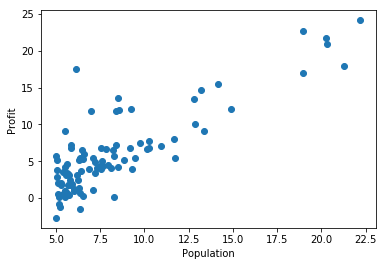

In [3]:
plt.scatter(x=data["Population"], y=data["Profit"])
plt.xlabel("Population")
plt.ylabel("Profit")

Ebben a példában a megfigyeléseink két részből állnak:

* Magyarázóváltozó (feature): $x$ (most a Population). Ez alapján szeretnénk előrejelezni.
* Célváltozó: $y$ (most a Profit). Ezt szeretnénk előrejelezni.

A megfigyeléseink száma $n$, az $i$. megfigyelés feature-eit $x^{(i)}$, a célváltozóját $y^{(i)}$ jelöli. Általános esetben minden egyes megfigyelés több, $n$ feature-t is tartalmazhat, így szerencsésebb a feature-öket indexelni: az $x^{(i)}_j$ az $i$. megfigyelés $j$. feature-e. Sőt, bevezetünk egy extra feature-t is, aminek konstans 1 az értéke, ez lesz a 0-ás számú (hamarosan látni fogjuk, hogy ez milyen jó ötlet): $x_0^{(i)}=1$. A továbbiakban a feature-ökből álló vektort értjük az index nélküli jelölés alatt: $x^{(i)}=[x^{(i)}_0,x^{(i)}_1,\dots,x^{(i)}_n]^T$. Ebben a példában $n=1$, így $x^{(i)}$ egy 2 elemű vektor lesz: a konstans 1, valamint a Population.

A lineáris regresszió lényege, hogy a célváltozót a magyarázó váltózók lineáris függvényével közelíti. Ha a becsült célváltozót $\hat{y}^{(i)}$-vel jelöljük, akkor ezt az alábbi alakban kapjuk meg:

$$ \hat{y}^{(i)} = \theta_0 + \theta_1 x^{(i)}_1.$$

Ez egy (lineáris) modell. Két paramétere van, $\theta_0$ és $\theta_1$, melyeket az egyszerűség kedvéért vektorba szoktak gyűjteni: $\theta=[\theta_0,\theta_1]^T$, így a célváltozó becslése vektorok segítségével még tömörebben kifejezhető:
$$ \hat{y}^{(i)} = \theta^T\cdot x^{(i)}$$
(Milyen jól jött a 0-ás feature bevezetése!) A gépi tanulás célja az $m$ megfigyelés alapján az optimális modell paraméterek, azaz $\theta_0$ és $\theta_1$ meghatározása. 

Hogy mit is jelent az, hogy *optimális*? Ezt egy ún. **loss function** (költségfüggvény) határozza meg, amit $J(\theta)$ jelöl, és pont azt írja le, hogy mennyire rossz a becslés ($\theta$ paraméterek mellett mekkora a veszteség). Lineáris regressziónál az átlagos négyzetes hibát (mean squared error, MSE) szokták alkalmazni, aminek az alakja:

$$J(\theta)=\frac{1}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{m}\sum_{i=1}^m (\theta_0 + \theta_1 x^{(i)}_1 - y^{(i)})^2$$

Miért szerencsés a négyzetre emelés? Mert így mindkét irányű hibát (alá- és fölélövést) is büntetni tudjuk. Használhatnánk négyzetreemelés helyett abszolút értéket is, de a négyzet matematikailag könnyebben kezelhető, mert minden pontban létezik a deriváltja.

### 1.1.1 Az optimális paraméterek meghatározása a loss function analitikus megoldásával

Jelen esetben a költségfüggvény annyira egyszerű, hogy matematikailag pontosan is meg határozni a minimumát. Ehhez a $J(\theta)$ függvényt deriválni kell $\theta$ szerint (vigyázat, vektorváltozó!), és ahol a derivált $0$, ott kapjuk az optimumot (na jó, kellene vizsgálni a második deriváltat is, de attól most eltekintünk).

Láttuk, hogy az $x^{(i)}$ feature-ök alapján a becslés $ \hat{y}^{(i)} = \theta^T\cdot x^{(i)}$. Ha az összes megfigyelésre felírjuk ezt az egyenletet, és egymás alá rendezzük őket, akkor megkapjuk, hogy 
$$ \hat{y} = X \theta, $$
ahol $\hat{y}$ az összes célváltozót tartalmazó $m\times 1$-es vektor, és $X$ az összes magyarázó változót tartalmazó $m\times (n+1)$-es mátrix. A loss függvény ezzel a jelöléssel:
$$ J(\theta) = \frac{1}{m}(y - X \theta)^T(y - X \theta),$$
melynek a $\theta$ szerinti deriváltja (nem triviális!):
$$ \frac{d}{d\theta} J(\theta) = \frac{2}{m}(X^T X \theta - X^T y).$$

Ennek a $0$ helyét egyszerű mátrix műveletekkel megkaphatjuk:
$$ \theta_{opt}=(X^T X)^{-1}X^T y.$$
Ezt nevezzük a *normál egyenletnek*.

Oldjuk meg ezt a példánkra!

In [41]:
import numpy as np
# konstans 1 oszlop, és a population oszlop alkotja az X mátrixot
X = np.hstack((np.ones((len(data),1)), np.matrix(data["Population"].values).T))
# a profit oszlop lesz az y vektor
y = np.matrix(data["Profit"].values).T
# optimális súlyok kiszámítása a normál egyenlettel
theta = (X.T*X).I.dot(X.T).dot(y)
theta

matrix([[-3.89578088],
        [ 1.19303364]])

Az optimális $\theta$ paraméterek ismeretében az előrejelzést megkaphatjuk az $X\theta$ mátrix szorzás segítségével.

Rajzoljuk ki az adatokat és a modellt is:

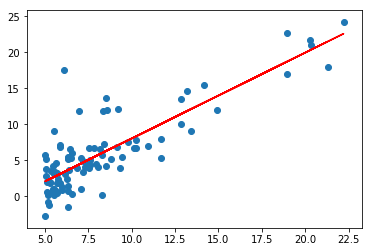

In [42]:
plt.plot(data["Population"], X.dot(theta), c="r", label='Model')
plt.scatter(data["Population"], data["Profit"], label='Train Set')

A loss (átlagos négyzetes hiba, $J(\theta)$) kiszámítása: 

In [44]:
mse = (1.0/len(data))*np.sum(np.power(y - X.dot(theta), 2))
mse

8.953942751950356

A gépi tanulás gyakorlatában a normál egyenletet nem használjuk. Egyrészt mert általában nem lineáris modellekkel dolgozunk, másrészt pedig mert $X$ jellemzően nagyon nagy, és nem szeretnénk hatalmas méretű mátrixokat szorozgatni/invertálni. A normál egyenlet helyett numerikus optimalizálást alkalmazunk. Ez egy iteratív eljárás, ami kezdetben egy véletlen tippel állítja elő $\theta$-t, majd iteratív módon javítgatja azt, amíg tudja. A gépi tanulásban messze a legelterjedtebb numerikus módszer a GD (gradient descent), és ennek változatai. Még a legbonyolúltabb deep learning rendszerekben is ezt használják, úgyhogy érdemes a lineáris regresszión keresztül megismerkedni vele.

A GD egy mohó algoritmus, nincs túl sok esze. A célja, hogy megtalálja a loss function minimumát. A loss function-t egy több dimenziós dombságként képzelhetjül el, esetünkben 3D-s, mivel minden $\theta_0$ és $\theta_1$ értékhez tartozik egy loss, $J(\theta)$:

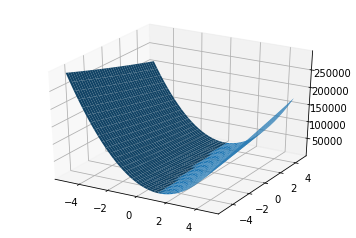

In [114]:
from mpl_toolkits.mplot3d import Axes3D
A = np.arange(-5, 5, 0.25)
B = np.arange(-5, 5, 0.25)
A, B = np.meshgrid(A, B)
Z = np.array([[(1.0/len(data))*np.sum(np.power(y-X.dot(np.array([A[i,j],B[i,j]])), 2)) for i in range(A.shape[0])] for j in range(B.shape[0])])

# Plot the surface.
plt.figure().gca(projection='3d').plot_surface(A, B, Z)

Ezen a felületen a GD mindig arra lép tovább, amerre a legmélyebb pontot sejti. Ehhez mindig kiszámítja a grádienst (ez ugye a hegytető felé mutat), 
és az ellenkező irányba mozdul, mégpedig annyit, amennyit a *learning rate* ($\alpha$) paraméter előír neki. Ha $\alpha$ túl kicsi, kicsiket lép, 
és lassan ér le a mélybe. Ha $\alpha$ túl nagy, fennáll a veszély, hogy átlépi az optimumot. Ez egy hiperparaméter, jól kell belőni az értékét.

Próbáljuk ki! A grádienst most két változóra kell kiszámolni. $\theta_0$ esetén:
$$ \frac{d}{d\theta_0}J(\theta) = \frac{2}{m}\sum_{i=1}^m (\theta_0 + \theta_1 x^{(i)}_1 - y^{(i)}), $$

$\theta_1$ esetén pedig:

$$ \frac{d}{d\theta_1}J(\theta) = \frac{2}{m}\sum_{i=1}^m (\theta_0 + \theta_1 x^{(i)}_1 - y^{(i)}) x^{(i)}_1, $$


In [105]:
def gradient(theta):
    dth0 = np.sum(theta0 + )

array([[1067601.97568183, 1022346.2323681 ,  978077.51186108, ...,
         470938.47297993,  501683.48578344,  533415.52139368],
       [1062882.33713183, 1017725.5313931 ,  973555.74846108, ...,
         473837.02770493,  504680.97808344,  536511.95126868],
       [1058174.82358183, 1013116.9554181 ,  969046.11006108, ...,
         476747.70742993,  507690.59538344,  539620.50614368],
       ...,
       [ 739667.55733183,  702030.0072931 ,  665379.48006108, ...,
         729604.93680493,  767968.14288344,  807318.37176868],
       [ 735881.54378183,  698342.9313181 ,  661791.34166108, ...,
         733437.11652993,  771899.26018344,  811348.42664368],
       [ 732107.65523183,  694667.9803431 ,  658215.32826108, ...,
         737281.42125493,  775842.50248344,  815390.60651867]])

In [116]:
theta = np.random.randn(2)
alpha = 0.5
numiter = 1
while True:
    gradiens, mse = gradient(theta)
    thetav = theta - alpha * gradiens    
    # leállási feltétel
    if np.sum(abs(thetav - theta)) < 1e-5:
        print("Vége.")
        break    
    # státusz üzenetek minden 100. lépésben
    if numiter % 100 == 0:
        print("{0}. iteráció, hiba: {1}".format(numiter, mse))
    
    num += 1
    theta = thetav
theta

NameError: name 'gradient' is not defined